## 文字量化分析

### 安裝Jieba

In [1]:
! pip install jieba

### In Mac

In [4]:
! curl https://raw.githubusercontent.com/ywchiu/taipeifubon/master/data/article.txt

漢肺炎讓中國處處封城、供應鏈斷光光…經濟學家警告：對台灣這些產業衝擊最慘

武漢肺炎疫情蔓延，中國春節延長且多地封城，造成復工困難，星展（DBS）分析，恐帶來供應鏈中斷風險，電子產業及紡織業將首當其衝，中間產品進出口高度仰賴中國的台灣、南韓及越南，將面臨最大壓力。

星展集團今天發表最新觀點，由星展集團資深經濟學家馬鐵英從供應鏈的角度，分析武漢肺炎對亞洲的影響。

馬鐵英指出，中國在全球製造業供應鏈扮演重要角色，其中紡織品和鞋類從中國出口的規模各占全球總額的34%及39%，機械與電子產品出口占比也達20%，同時也在電子產業供應鏈中具有關鍵角色，目前蘋果全球800個生產基地有近一半位於中國，蘋果前200名供應商名單中，也約有30家為中企。

馬鐵英說，此次武漢肺炎疫情爆發的中心湖北省，為中國鋼鐵、汽車以及半導體、平板和其它電子元件等電子產業的主要製造中心之一，相鄰的河南省正是蘋果最大的iPhone代工和組裝商富士康的主要生產基地。

另一方面，從中國與鄰近國家供應鏈的關係來看，馬鐵英表示，中國主要從南韓、日本和台灣進口中間產品，其中，又以台灣對中國的依賴程度最高，其次為南韓，逾4成中間產品出口至中國。中國製造的中間產品則主要出口至南韓和日本，其次為印度和越南，其中以越南對中國依賴度最高，逾3成中間產品進口來源為中國。

綜合以上，馬鐵英認為，此次武漢肺炎疫情爆發，導致中國春節假期延長，受封城影響，部分生產、運輸及交通也中斷，使勞工無法順利返回工作崗位，恐引發下游延後生產，或是上游原料供應短缺等斷鏈風險，對亞洲地區帶來負面外溢效應，其中以紡織業、電子產業最容易受到影響，台灣、南韓和越南受到的衝擊則將最為嚴重。

馬鐵英表示，武漢肺炎疫情爆發考驗中國政府的危機管理能力，並引發全球對中國公共治理、醫療基礎設施、大眾傳播、環境保護和其它相關問題的關注；值得留意的是，長期來看，這是否會影響外資在中國的投資信心，進而重新進行供應鏈佈局。

馬鐵英說，過去幾年受到美中貿易戰影響，一些跨國公司已經開始將生產基地從中國轉移到越南和台灣等鄰近國家，此種多元佈局供應鏈的趨勢，也許會再進一步深化。


### In Windows

In [6]:
import requests
res = requests.get('https://raw.githubusercontent.com/ywchiu/taipeifubon/master/data/article.txt')
news = res.text

In [14]:
news = '武'+ news

### 使用Jieba 切詞

In [16]:
import jieba
jieba.load_userdict('userdict.txt')
news_cut = list(jieba.cut(news))
#news_cut

In [18]:
dic = {}
for w in news_cut:
    if w not in dic:
        dic[w] = 1
    else:
        dic[w] = dic[w] + 1

In [20]:
swd = sorted(dic.items(), key = lambda e: e[1], reverse=True)

In [24]:
for k,v in swd[0:20]:
    if len(k) >= 2:
        print(k, v)

中國 19
供應鏈 8
馬鐵英 7
武漢肺炎 6
台灣 6
電子 6
產品 6
產業 5
中間 5
南韓 5


In [26]:
from collections import Counter
c = Counter(news_cut)
for k,v in c.most_common(20):
    if len(k) >= 2:
        print(k,v)

中國 19
供應鏈 8
馬鐵英 7
武漢肺炎 6
台灣 6
電子 6
產品 6
產業 5
中間 5
南韓 5


## 使用wordcloud 做文字雲視覺化

In [27]:
! pip install wordcloud

In [28]:
from wordcloud import WordCloud


In [29]:
text = 'i love this book i love dog i love cat'
wordcloud = WordCloud().generate(text)

(-0.5, 399.5, 199.5, -0.5)

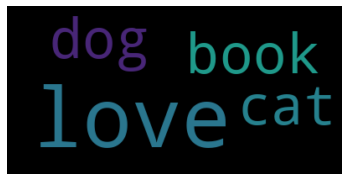

In [30]:
import matplotlib.pyplot as plt
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

### 產生中文文字雲

In [34]:
! ls /Users/davidchiu/Desktop/NotoSans-Regular.ttf

/Users/davidchiu/Desktop/NotoSans-Regular.ttf


In [37]:
import jieba
fontpath = '/Users/davidchiu/Desktop/NotoSansCJKtc-Regular.otf'
jieba.load_userdict('userdict.txt')
news_cut = list(jieba.cut(news))
text = ' '.join(news_cut)
wordcloud = WordCloud(font_path=fontpath).generate(text)
#text

(-0.5, 399.5, 199.5, -0.5)

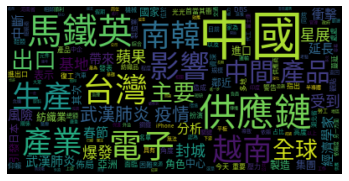

In [38]:
import matplotlib.pyplot as plt
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

## 小任務
- 請使用 wordcloud 呈現 川普演說文的文字雲
(https://raw.githubusercontent.com/ywchiu/taipeifubon/master/data/trump.txt)
- https://i1.wp.com/pocketmoney.tw/wp-content/uploads/2017/03/%E5%B7%9D%E6%99%AE.png?ssl=1

In [40]:
import requests
res = requests.get('https://raw.githubusercontent.com/ywchiu/taipeifubon/master/data/trump.txt')
trump = res.text

In [48]:
import jieba
wordcloud = WordCloud(background_color="white",width=1000, height=400, margin=2).generate(trump)

(-0.5, 999.5, 399.5, -0.5)

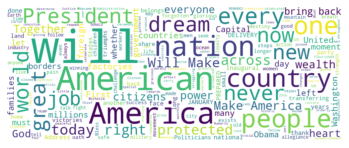

In [49]:
import matplotlib.pyplot as plt
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

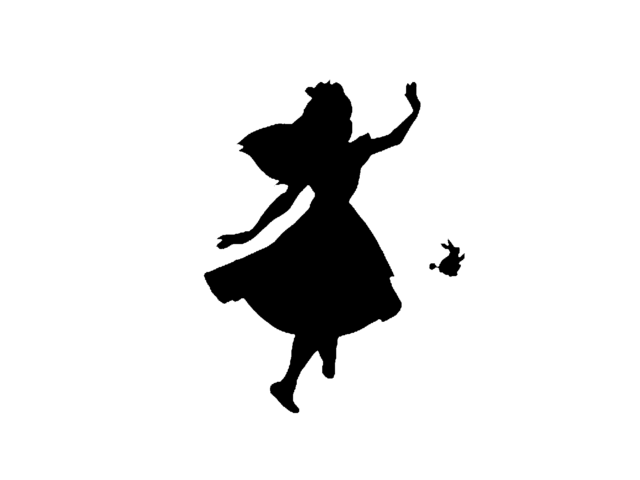

In [153]:
from PIL import Image
img = Image.open('/Users/davidchiu/Desktop/sphx_glr_masked_002.png')
img

In [154]:
from imageio import imread
back_coloring = imread('/Users/davidchiu/Desktop/sphx_glr_masked_002.png')

In [155]:
back_coloring.shape

(480, 640, 4)

In [157]:
#back_coloring

In [158]:
import jieba
wordcloud = WordCloud(background_color="white", max_words=2000, mask=back_coloring,
               max_font_size=100, random_state=42, width=800, height=560, margin=2).generate(trump)

(-0.5, 639.5, 479.5, -0.5)

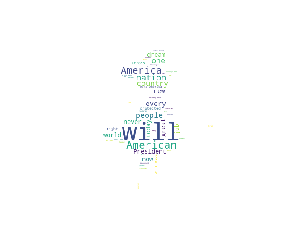

In [159]:
import matplotlib.pyplot as plt
plt.imshow(wordcloud)
plt.axis("off")

In [160]:
from imageio import imread
back_coloring = imread('/Users/davidchiu/Desktop/川普.png')

In [162]:
back_coloring.shape

(736, 878, 4)

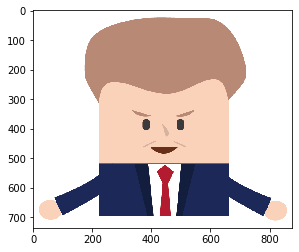

In [171]:
from matplotlib.pyplot import imshow
imshow(back_coloring)

In [185]:
import numpy as np
img2 = (back_coloring > 250).astype(int) * 255

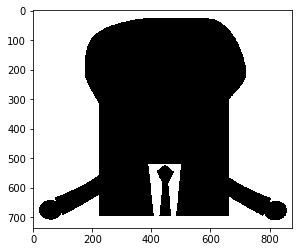

In [186]:
imshow(img2)

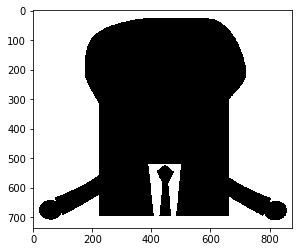

In [193]:
img3 = imshow(img2)
img3

In [187]:
img2.shape

(736, 878, 4)

In [196]:
import jieba
wordcloud = WordCloud( max_words=2000, mask=img2,
               max_font_size=100, random_state=42, width=700, height=860, margin=2).generate(trump)

(-0.5, 877.5, 735.5, -0.5)

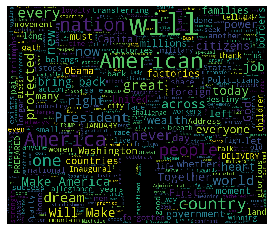

In [195]:
import matplotlib.pyplot as plt
plt.imshow(wordcloud)
plt.axis("off")

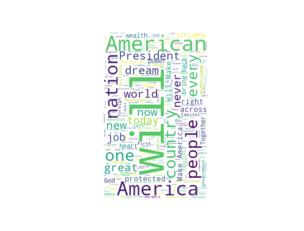

In [102]:
from wordcloud import ImageColorGenerator
wc = WordCloud(background_color="white", max_words=2000, mask=back_coloring,
               max_font_size=100, random_state=42, width=1000, height=860, margin=2,)


wc.generate(trump)

# create coloring from image
image_colors_default = ImageColorGenerator(back_coloring)

plt.figure()
# recolor wordcloud and show
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()

## 計算 tf-idf

In [105]:
import math

In [104]:
a,abb, abc = ['a'], ['a', 'b', 'b'], ['a', 'b', 'c']
D = [a, abb, abc]

In [106]:
#tfidf('a', a , D)
tf = 1/1
idf = math.log(3/3)
tf, idf

(1.0, 0.0)

In [107]:
#tfidf('a', abb , D)
tf = 1/3
idf = math.log(3/3)
tf, idf

(0.3333333333333333, 0.0)

In [109]:
#tfidf('b', abb , D)
tf = 2/3
idf = math.log(3/2)
tf, idf
tf * idf

0.27031007207210955

In [110]:
#tfidf('a', abc , D)
tf = 1/3
idf = math.log(3/3)
tf, idf

(0.3333333333333333, 0.0)

In [111]:
#tfidf('b', abc , D)
tf = 1/3
idf = math.log(3/2)
tf, idf
tf * idf

0.13515503603605478

In [112]:
#tfidf('c', abc , D)
tf = 1/3
idf = math.log(3/1)
tf, idf
tf * idf

0.3662040962227032

In [113]:
a,abb, abc = ['a'], ['a', 'b', 'b'], ['a', 'b', 'c']
D = [a, abb, abc]

In [114]:
def tfidf(t, d, D):
    tf = d.count(t) / len(d)
    idf = math.log(len(D) / len([doc for doc in D if t in doc]))
    return tf * idf

In [115]:
tfidf('a', a , D)

0.0

In [116]:
tfidf('a', abb , D)

0.0

In [117]:
tfidf('a', abc , D)

0.0

In [118]:
tfidf('b', abb , D)

0.27031007207210955

In [119]:
tfidf('b', abc , D)

0.13515503603605478

In [120]:
tfidf('c', abc , D)

0.3662040962227032

In [131]:
from sklearn.feature_extraction.text import TfidfVectorizer
a,abb, abc = ['apple'], ['apple', 'bannana', 'bannana'], ['apple', 'bannana', 'cat']

a, abb, abc = ' '.join(a),' '.join(abb),' '.join(abc) 
D = [a, abb, abc]

In [132]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(D)
X.toarray()

array([[1.        , 0.        , 0.        ],
       [0.361965  , 0.93219169, 0.        ],
       [0.42544054, 0.54783215, 0.72033345]])

In [134]:
jieba.get_dict_file()

<_io.BufferedReader name='/Users/davidchiu/.pyenv/versions/3.6.2/lib/python3.6/site-packages/jieba/dict.txt'>

In [136]:
! ls /Users/davidchiu/.pyenv/versions/3.6.2/lib/python3.6/site-packages/jieba/analyse

__init__.py __pycache__ analyzer.py idf.txt     textrank.py tfidf.py


In [137]:
! head /Users/davidchiu/.pyenv/versions/3.6.2/lib/python3.6/site-packages/jieba/analyse/idf.txt

劳动防护 13.900677652
生化学 13.900677652
奥萨贝尔 13.900677652
考察队员 13.900677652
岗上 11.5027823792
倒车档 12.2912397395
编译 9.21854642485
蝶泳 11.1926274509
外委 11.8212361103
故作高深 11.9547675029


In [133]:
import jieba.analyse

jieba.analyse.extract_tags(news, topK=20)

['中國',
 '供應鏈',
 '馬鐵英',
 '武漢肺炎',
 '台灣',
 '電子',
 '產品',
 '產業',
 '中間',
 '南韓',
 '影響',
 '生產',
 '越南',
 '封城',
 '星展',
 '蘋果',
 '爆發',
 '疫情',
 '經濟學家',
 '衝擊']

## 詞頻矩陣

In [197]:
content = ['how to format my hard disk', 'hard disk format problems']

words = set()
for s in content:
    for w in s.split():
        words.add(w)
words

{'disk', 'format', 'hard', 'how', 'my', 'problems', 'to'}

In [204]:
id_to_word = {}
word_to_id = {}
for idx, word in enumerate(words):
    print(idx, word)
    id_to_word[idx] = word
    word_to_id[word] = idx

0 disk
1 to
2 problems
3 my
4 how
5 hard
6 format


In [205]:
id_to_word

{0: 'disk', 1: 'to', 2: 'problems', 3: 'my', 4: 'how', 5: 'hard', 6: 'format'}

In [206]:
word_to_id

{'disk': 0, 'to': 1, 'problems': 2, 'my': 3, 'how': 4, 'hard': 5, 'format': 6}

In [201]:
import numpy 
X = numpy.zeros((len(content),len(words)))

In [202]:
X

array([[0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.]])

In [208]:
for i, sentence in enumerate(content):
    for word in sentence.split():
        j = word_to_id[word]        
        X[i,j] = 1

In [209]:
X

array([[1., 1., 0., 1., 1., 1., 1.],
       [1., 0., 1., 0., 0., 1., 1.]])

In [211]:
from sklearn.feature_extraction.text import CountVectorizer
content = ['how to format my hard disk', 'hard disk format problems']
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(content)

In [212]:
X

<2x7 sparse matrix of type '<class 'numpy.longlong'>'
	with 10 stored elements in Compressed Sparse Row format>

In [213]:
X.toarray()

array([[1, 1, 1, 1, 1, 0, 1],
       [1, 1, 1, 0, 0, 1, 0]], dtype=int64)

In [214]:
vectorizer.get_feature_names()

['disk', 'format', 'hard', 'how', 'my', 'problems', 'to']

In [215]:
contents = [
'This is a toy post about machine learning. Actually, it contains not much interesting stuff.',
'Imaging databases can get huge.',
'Most imaging databases safe images permanently.',
'Imaging databases store images.',
'Imaging databases store images. Imaging databases store images. Imaging databases store images.']


In [216]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(contents)


In [217]:
X

<5x24 sparse matrix of type '<class 'numpy.longlong'>'
	with 33 stored elements in Compressed Sparse Row format>

### fit, fit_transform, transform
- fit: 根據資料產生架構
- fit_transform: 根據資料產生架構，再根據架構做資料轉換
- transform: 根據提供架構，做資料轉換

In [218]:
new_post = 'imaging database'
new_post_vec = vectorizer.transform([new_post])
new_post_vec

<1x24 sparse matrix of type '<class 'numpy.int64'>'
	with 1 stored elements in Compressed Sparse Row format>

In [222]:
print(vectorizer.get_feature_names())

['about', 'actually', 'can', 'contains', 'databases', 'get', 'huge', 'images', 'imaging', 'interesting', 'is', 'it', 'learning', 'machine', 'most', 'much', 'not', 'permanently', 'post', 'safe', 'store', 'stuff', 'this', 'toy']


In [220]:
new_post_vec.toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0]])

In [223]:
new_post = 'imaging databases'
new_post_vec = vectorizer.transform([new_post])
new_post_vec

<1x24 sparse matrix of type '<class 'numpy.int64'>'
	with 2 stored elements in Compressed Sparse Row format>

In [224]:
new_post_vec.toarray()

array([[0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0]])

In [226]:
a = numpy.array([1,0,0])
b = numpy.array([0,0,1])
(a - b).sum()

0

In [229]:
import math
math.sqrt(((a - b) ** 2).sum())

1.4142135623730951

In [234]:
import scipy as sp
# euclidean distance
def dist_raw(v1, v2):
    delta = v1-v2
    return sp.linalg.norm(delta) # sp.linalg.norm: log(delta ** 2)
dist_raw(a,b)

1.4142135623730951

In [237]:
X

<5x24 sparse matrix of type '<class 'numpy.longlong'>'
	with 33 stored elements in Compressed Sparse Row format>

In [238]:
new_post_vec

<1x24 sparse matrix of type '<class 'numpy.int64'>'
	with 2 stored elements in Compressed Sparse Row format>

In [239]:
def dist_raw(v1, v2):
    delta = v1-v2
    return sp.linalg.norm(delta.toarray()) # sp.linalg.norm: log(delta ** 2)

In [240]:
for i in range(5):
    d = dist_raw(X[i], new_post_vec)
    print(contents[i], d)


This is a toy post about machine learning. Actually, it contains not much interesting stuff. 4.0
Imaging databases can get huge. 1.7320508075688772
Most imaging databases safe images permanently. 2.0
Imaging databases store images. 1.4142135623730951
Imaging databases store images. Imaging databases store images. Imaging databases store images. 5.0990195135927845


In [242]:
# 柯文哲 大巨蛋 遠雄 
# 柯文哲 大巨蛋 遠雄 趙藤雄 北檢 按鈴 控告 

def dist_raw2(v1, v2):
    delta = v1-v2
    return sp.linalg.norm(delta) # sp.linalg.norm: log(delta ** 2)

y1 = numpy.array([1,1,1,0,0,0,0])
y2 = numpy.array([1,1,1,1,1,1,1])
dist_raw2(y1,y2)

2.0

In [243]:
def dist(v1, v2):
    v1_normalized  = v1 / sp.linalg.norm(v1.toarray()) 
    v2_normalized  = v2 / sp.linalg.norm(v2.toarray())
    delta = v1_normalized - v2_normalized
    return sp.linalg.norm(delta.toarray())


In [244]:
for i in range(5):
    d = dist(X[i], new_post_vec)
    print(contents[i], d)


This is a toy post about machine learning. Actually, it contains not much interesting stuff. 1.414213562373095
Imaging databases can get huge. 0.8573732768944039
Most imaging databases safe images permanently. 0.9194016867619662
Imaging databases store images. 0.7653668647301795
Imaging databases store images. Imaging databases store images. Imaging databases store images. 0.7653668647301795
